In [104]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils as u

notes_dict = {
"s": 0,
"R1": 100,
"R2": 200,
"G2": 300,
"G3": 400,
"M1": 500,
"M2": 600,
"P": 700,
"D1": 800,
"D2": 900,
"N2": 1000,
"N3": 1100,
"Sa": 1200,
"R1": 1300,
"R2": 1400,
"G2": 1500,
"G3": 1600,
"M1": 1700,
"M2": 1800,
"P": 1900,
"D1": 2000,
"D2": 2100,
"N2": 2200,
"N3": 2300,
"Sa": 2400,
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
pitchfile = "thodi/Karuna Nidhi Illalo/Karuna Nidhi Illalo.multitrack-violin-solo-processed.pitch"
times, f0 = np.loadtxt(pitchfile).T
length_s = times[-1]

# Track info
raga, piece, instrument, section = u.process_filename(pitchfile)
print("Raga:", raga)
print("Piece:", piece)
print("Instrument:", instrument)
print("Section:", section)

# Load the tonics
vitonic_path = raga + "/" + piece + "/" + piece + ".multitrack-violin-main.tonic"
votonic_path = raga + "/" + piece + "/" + piece + ".ctonic.txt"
tonic_violin = np.loadtxt(vitonic_path)
tonic_vocal = np.loadtxt(votonic_path)
print("Violin tonic:", tonic_violin, "Hz, Vocal tonic:", tonic_vocal, "Hz")

# Set the tonic based on the instrument
if instrument == "vocal":
    tonic = tonic_vocal
    print("Using vocal tonic")
else:
    tonic = tonic_violin
    print("Using violin tonic")

# Convert f0 to cents
cents = u.hz_to_cents(f0, tonic)

Raga: thodi
Piece: Karuna Nidhi Illalo
Instrument: violin
Section: solo
Violin tonic: 135.63082885742188 Hz, Vocal tonic: 135.425885 Hz
Using violin tonic


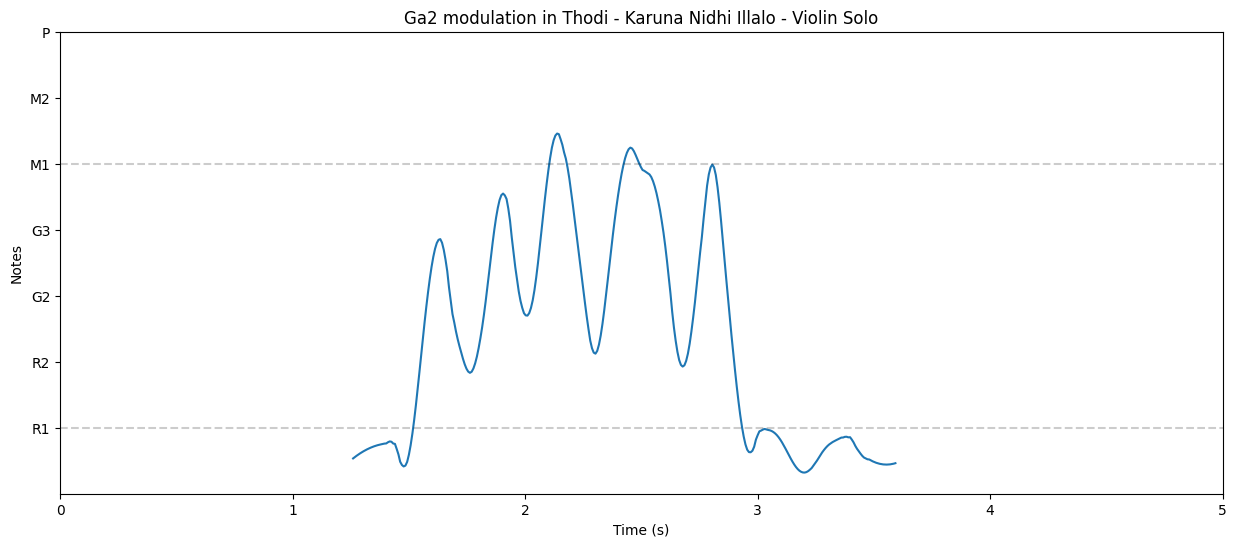

In [114]:
cents_filt = u.savitsky_golay_filter(cents, window_size=31, order=2)
# peaks,_ = u.find_peaks(cents_filt, height = 1600)
# Disregard all peaks more than 1450
# peaks = peaks[cents_filt[peaks] < 1900]
plt.figure(figsize=(15, 6))
plt.plot(times, np.where(cents_filt > 0, cents_filt, np.nan))
# plt.scatter(times[peaks], cents_filt[peaks], color='red')
plt.xlabel("Time (s)")
plt.xlim(0, 5)
# Add y ticks based on notes_dict, as a secondary axis
plt.yticks(list(notes_dict.values()), list(notes_dict.keys()))
# Add horizontal lines for 1300 and 1500
plt.axhline(y=1300, color='black', linestyle='--', alpha=0.2)
plt.axhline(y=1700, color='black', linestyle='--', alpha=0.2)
plt.ylim(1200, 1900)
plt.ylabel("Notes")
plt.title("Ga2 modulation in Thodi - Karuna Nidhi Illalo - Violin Solo")
plt.show()
